In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

In [9]:
df = pd.read_csv('data.csv')


In [14]:
df.shape

(2225, 2)

In [10]:
df.head()

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2225 non-null   object
 1   Label   2225 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB


In [15]:
df.isnull().sum()

Text     0
Label    0
dtype: int64

###  Limpieza de los textos

In [ ]:
import re
def normalize_text(text):
    text = text.lower()
    text = re.sub('[\s]+', ' ', text) # Remove additional spaces
     # Eliminar puntuación
    text = re.sub(r'[^\w\s]', '', text)
    return text


df['text_cleaned'] = df['Text'].apply(normalize_text)



,Text,Label,text_cleaned
0,Budget to set scene for election\n \n Gordon B...,0,budget to set scene for election gordon brown ...
1,Army chiefs in regiments decision\n \n Militar...,0,army chiefs in regiments decision military chi...
2,Howard denies split over ID cards\n \n Michael...,0,howard denies split over id cards michael howa...
3,Observers to monitor UK election\n \n Minister...,0,observers to monitor uk election ministers wil...
4,Kilroy names election seat target\n \n Ex-chat...,0,kilroy names election seat target exchat show ...


In [24]:
df = df.drop(['Text'], axis=1)
df.head()

,Label,text_cleaned
0,0,budget to set scene for election gordon brown ...
1,0,army chiefs in regiments decision military chi...
2,0,howard denies split over id cards michael howa...
3,0,observers to monitor uk election ministers wil...
4,0,kilroy names election seat target exchat show ...


In [29]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['text_cleaned'])

# Convertir el texto a secuencias numericas
sequences = tokenizer.texts_to_sequences(df['text_cleaned'])
max_length = 20
padded_sequences = pad_sequences(sequences, maxlen= max_length, padding='post')

In [30]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['Label'], test_size=0.2, random_state=42)

### Construcción del modelo

In [31]:
vocab_size = len(tokenizer.word_index) +1
embedding_dim = 100

model = Sequential([
    Embedding(input_dim=vocab_size,  output_dim=embedding_dim, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(5, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 100)           3457600   
                                                                 
 global_average_pooling1d (  (None, 100)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 128)               12928     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                        

In [36]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
45/45 [==============================] - 2s 44ms/step - loss: 2.7752e-05 - accuracy: 1.0000 - val_loss: 2.5429 - val_accuracy: 0.6770
Epoch 2/50
45/45 [==============================] - 2s 42ms/step - loss: 2.6148e-05 - accuracy: 1.0000 - val_loss: 2.5536 - val_accuracy: 0.6770
Epoch 3/50
45/45 [==============================] - 2s 43ms/step - loss: 2.4648e-05 - accuracy: 1.0000 - val_loss: 2.5679 - val_accuracy: 0.6770
Epoch 4/50
45/45 [==============================] - 2s 38ms/step - loss: 2.3252e-05 - accuracy: 1.0000 - val_loss: 2.5817 - val_accuracy: 0.6742
Epoch 5/50
45/45 [==============================] - 2s 38ms/step - loss: 2.1995e-05 - accuracy: 1.0000 - val_loss: 2.5948 - val_accuracy: 0.6742
Epoch 6/50
45/45 [==============================] - 2s 41ms/step - loss: 2.0807e-05 - accuracy: 1.0000 - val_loss: 2.6049 - val_accuracy: 0.6742
Epoch 7/50
45/45 [==============================] - 2s 45ms/step - loss: 1.9694e-05 - accuracy: 1.0000 - val_loss: 2.6181 - val_ac

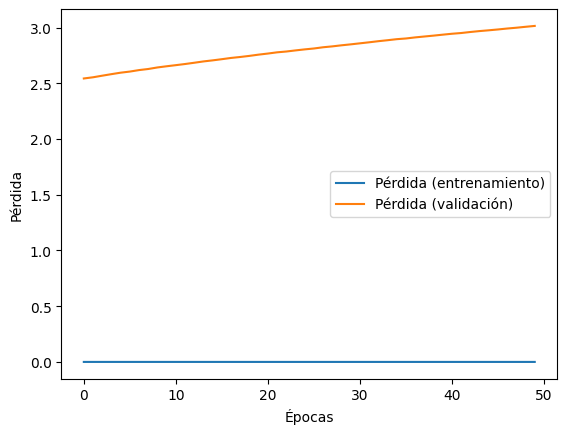

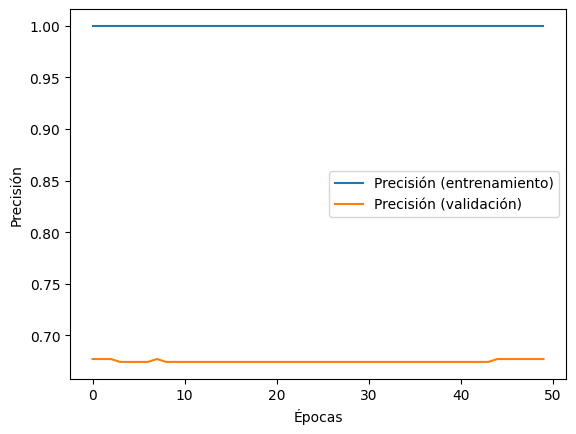

In [37]:
import matplotlib.pyplot as plt 
 
# Pérdida 
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)') 
plt.plot(history.history['val_loss'], label='Pérdida (validación)') 
plt.xlabel('Épocas') 
plt.ylabel('Pérdida') 
plt.legend() 
plt.show() 
 
# Precisión 
plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)') 
plt.plot(history.history['val_accuracy'], label='Precisión (validación)') 
plt.xlabel('Épocas') 
plt.ylabel('Precisión') 
plt.legend() 
plt.show() 

In [ ]:
# Función para preprocesar un nuevo titular
def preprocess_new_text(text):
    headline = normalize_text(text)
    sequence = tokenizer.texts_to_sequences([headline])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')
    return padded_sequence

# Hacer una predicción
new_text = "New tech startup raises millions in funding"
preprocessed_headline = preprocess_new_text(new_text)
prediction = model.predict(preprocessed_headline)
# Convertir a porcentaje
percentages = prediction * 100
# Imprimir con dos decimales
np.set_printoptions(suppress=True)
array_percentages = percentages.flatten().tolist()
classes = df['Label'].unique()

for i, classe in enumerate(classes):
    print(f"Porcentaje clase {classe}  es de {round(array_percentages[i],2)}%")

predicted_class = np.argmax(prediction, axis=1)
print(f'Predicción: {predicted_class[0]}')

1/1 [==============================] - 0s 34ms/step
Porcentaje clase 0  es de 0.18%
Porcentaje clase 1  es de 0.14%
Porcentaje clase 2  es de 96.94%
Porcentaje clase 3  es de 0.02%
Porcentaje clase 4  es de 2.72%
Predicción: 2


In [75]:
# Obtener predicciones del modelo
y_pred = model.predict(X_test)

# Convertir de one-hot encoding a etiquetas categóricas
y_pred_classes = np.argmax(y_pred, axis=1)

14/14 [==============================] - 0s 2ms/step


In [79]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc:.4f}')

from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(5)]
print(classification_report(y_test, y_pred_classes, target_names=target_names))

14/14 [==============================] - 0s 2ms/step - loss: 3.6719 - accuracy: 0.6112
Precisión en el conjunto de prueba: 0.6112
              precision    recall  f1-score   support

     Class 0       0.70      0.47      0.56        92
     Class 1       0.70      0.74      0.72        98
     Class 2       0.37      0.60      0.45        77
     Class 3       0.78      0.62      0.69        76
     Class 4       0.68      0.62      0.65       102

    accuracy                           0.61       445
   macro avg       0.65      0.61      0.61       445
weighted avg       0.65      0.61      0.62       445



14/14 [==============================] - 0s 3ms/step


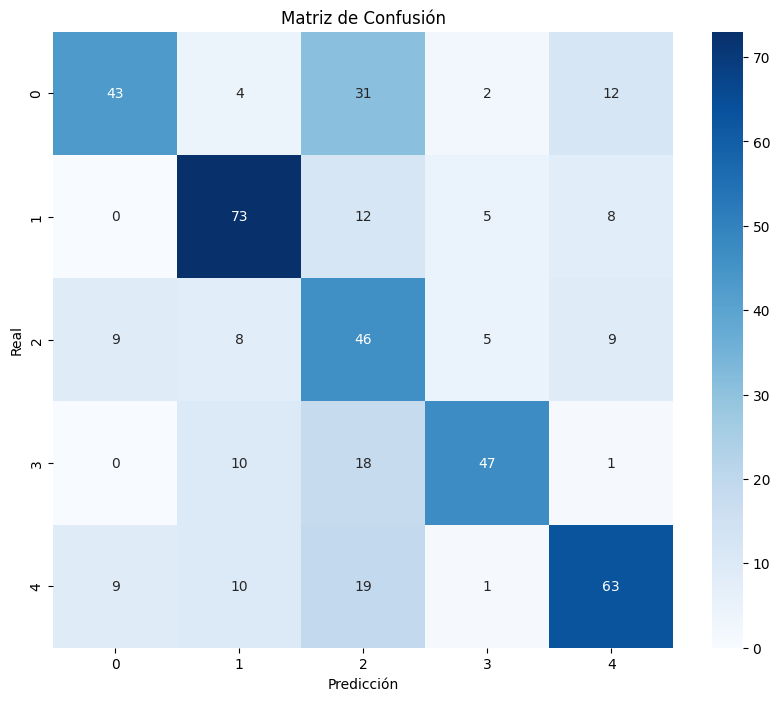

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()